## Use Case 2: Combine different data on a map 

In [2]:
# Needed in IPython notebook only
from IPython.display import Image   
%matplotlib inline

In [2]:
from nansat import *
n = Nansat('ncep_wind_online:201508010000')
print n

11:12:59|40|nansat|_get_mapper|GDAL could not open ncep_wind_online:201508010000, trying to read with Nansat mappers...
ERROR:Nansat:GDAL could not open ncep_wind_online:201508010000, trying to read with Nansat mappers...


2015-08-01 00:00:00
NRT GRIB file not available: ftp://ftp.ncep.noaa.gov/pub/data/nccf/com/gfs/prod/gfs.2015080100/gfs.t00z.master.grbf000.10m.uv.grib2
Already downloaded /root/ncep_gfs_downloads/gfs_4_20150801_0000_000.grb2
----------------------------------------
ncep_wind_online:201508010000
----------------------------------------
Mapper: ncep_wind_online
----------------------------------------
Band : 1 U
  units: m s-1
  name: U
  short_name: U
  dataType: 7
  height: 10 m
  long_name: Eastward wind velocity
  standard_name: eastward_wind
  SourceFilename: /root/ncep_gfs_downloads/gfs_4_20150801_0000_000.grb2
  time: 2015-08-01T00:00:00
  minmax: -10 10
  SourceBand: 1
  wkv: eastward_wind
  colormap: jet
Band : 2 V
  units: m s-1
  name: V
  short_name: V
  dataType: 7
  height: 10 m
  long_name: Northward wind velocity
  standard_name: northward_wind
  SourceFilename: /root/ncep_gfs_downloads/gfs_4_20150801_0000_000.grb2
  time: 2015-08-01T00:00:00
  minmax: -10 10
  SourceBand

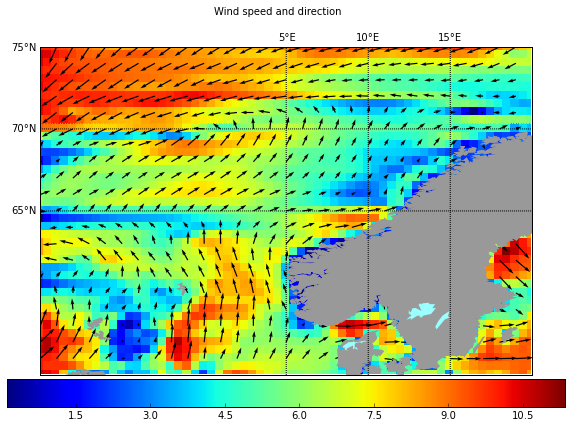

In [3]:
d = Domain('+proj=longlat', '-te -10 55 20 75 -tr 0.1 0.1')
n.reproject(d)

u = n['U']
v = n['V']
w = np.hypot(u,v)

# create canvas to draw a map
nmap = Nansatmap(n, resolution='l')

# make plot of wind speed (color) and add colorbar
nmap.pcolormesh(w)
nmap.add_colorbar(fontsize=10)

# add vectors showing wind directions
nmap.quiver(u, v, step=10)

# add continents on top
nmap.draw_continents()

# draw grid of parallels and meridians
# at given locations
nmap.drawparallels([65, 70, 75], labels=[1,0,0,0])
nmap.drawmeridians([5, 10, 15, 20, 25], labels=[0,0,1,0])

# add title
plt.suptitle('Wind speed and direction')

# set size of the figure (inches)
nmap.fig.set_figheight(7)
nmap.fig.set_figwidth(10)

# save figure to a PNG file
nmap.save('usecase2a.png')

## Exercise:
### Create  a wind map for your area of interest for 1 Jan 2015